In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Data_Train (1).xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print("This dataset have %d rows dan %d columns"%df.shape)

This dataset have 10683 rows dan 11 columns


In [5]:
drop_cols=['Additional_Info', 'Arrival_Time']
df1 = df.drop(drop_cols, axis=1)

# Defining Variables

In this project, the main objective is to predict price that comsumer has to pay.
In this dataset, the Price variable is a variable that can be used as a target variable.

# Featuring enginering

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


In [7]:
df1['Duration']=df1['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace("m","*1").apply(eval)

In [8]:
df1['Dep_Hour']=pd.to_datetime(df1['Dep_Time']).dt.hour

In [9]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price,Dep_Hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,170,non-stop,3897,22
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,445,2 stops,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,1140,2 stops,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,325,1 stop,6218,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,285,1 stop,13302,16


In [10]:
df1['time_cat'] = pd.cut(df1['Dep_Hour'],
                         bins = [0,4,8,12,16,20,24],
                         labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

In [11]:
df1['time_cat'] = df1['time_cat'].astype('object')

In [12]:
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price,Dep_Hour,time_cat
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,170,non-stop,3897,22,Night
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,445,2 stops,7662,5,Early Morning


# Handling Missing Value and Duplicate

In [13]:
print(f'Duplicates and distinct in applications df:{df1.iloc[:,1:].duplicated().sum()}, ({np.round(100*df1.iloc[:,1:].duplicated().sum()/len(df1),1)}%)')

Duplicates and distinct in applications df:222, (2.1%)


In [14]:
df1.drop_duplicates(keep='first', inplace=True)

In [15]:
print(f'After romove Duplicates in applications df:{df1.iloc[:,1:].duplicated().sum()}, ({np.round(100*df1.iloc[:,1:].duplicated().sum()/len(df1),1)}%)')

After romove Duplicates in applications df:0, (0.0%)


In [16]:
#checing the missing values(%)
def chek_missing(df):
    sum_NAN = df1.isnull().sum().reset_index()
    sum_NAN.columns = ['Columns', 'NaN_count']
    sum_NAN["Percentage"] = sum_NAN.NaN_count/len(df)*100
    return sum_NAN.sort_values("Percentage", ascending =  False)
chek_missing(df1)

,Columns,NaN_count,Percentage
10,time_cat,40,0.382373
4,Route,1,0.009559
7,Total_Stops,1,0.009559
0,Airline,0,0.000000
1,Date_of_Journey,0,0.000000
2,Source,0,0.000000
3,Destination,0,0.000000
5,Dep_Time,0,0.000000
6,Duration,0,0.000000
8,Price,0,0.000000


In [17]:
modus = df1['Route'].mode()[0]
df1['Route'] = df1['Route'].fillna(modus)

In [18]:
modus = df1['time_cat'].mode()[0]
df1['time_cat'] = df1['time_cat'].fillna(modus)

In [19]:
modus = df1['Total_Stops'].mode()[0]
df1['Total_Stops'] = df1['Total_Stops'].fillna(modus)
chek_missing(df1)

,Columns,NaN_count,Percentage
0,Airline,0,0.0
1,Date_of_Journey,0,0.0
2,Source,0,0.0
3,Destination,0,0.0
4,Route,0,0.0
5,Dep_Time,0,0.0
6,Duration,0,0.0
7,Total_Stops,0,0.0
8,Price,0,0.0
9,Dep_Hour,0,0.0



# EDA

<AxesSubplot:>

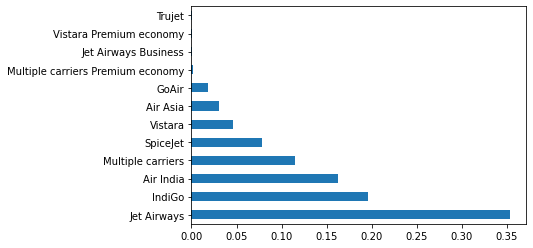

In [20]:
airplane_value = (df1.Airline.value_counts(normalize=True))
airplane_value.plot.barh()

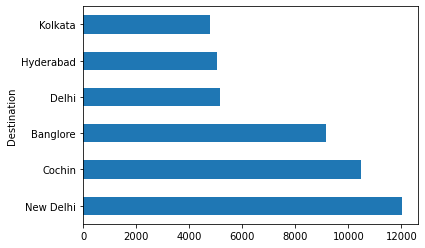

In [21]:
df1.groupby(["Destination"]).Price.mean().sort_values(ascending=False).plot.barh()
plt.show()

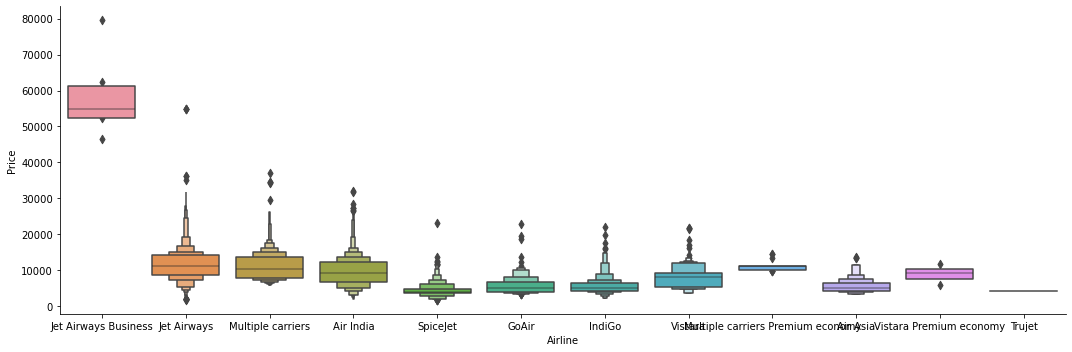

In [22]:
#Price vs Airline
sns.catplot(x='Airline', y='Price',data=df1.sort_values('Price',ascending=False), kind='boxen', height=5,aspect=3, margin_titles=True)

In [23]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price,Dep_Hour,time_cat
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,170,non-stop,3897,22,Night
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,445,2 stops,7662,5,Early Morning
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,1140,2 stops,13882,9,Morning
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,325,1 stop,6218,18,Eve
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,285,1 stop,13302,16,Noon


In [24]:
import datetime
df1["date_month"]=df1["Date_of_Journey"].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y/%m"))

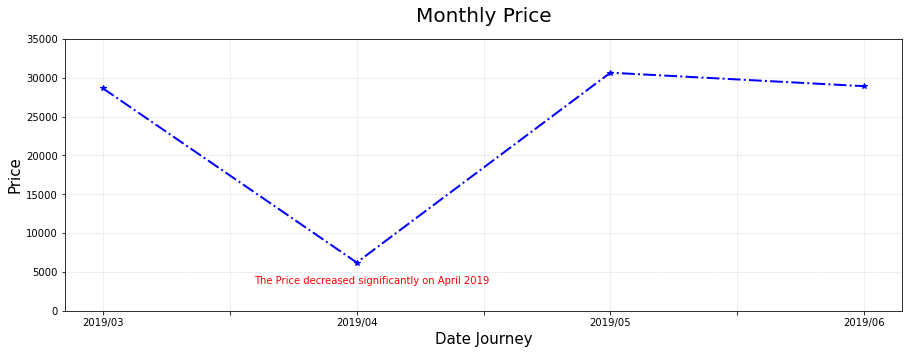

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
df1.groupby(['date_month'])['Price'].sum().plot(color='blue', marker='*', linestyle='-.', linewidth=2)
plt.title('Monthly Price', loc='center', pad=17, fontsize=20, color='black')
plt.xlabel('Date Journey', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.text(0.30, 0.2, 'The Price decreased significantly on April 2019', transform=fig.transFigure, color='red')
plt.show()

# Check Categorical Feature in DF Application

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10461 non-null  object
 1   Date_of_Journey  10461 non-null  object
 2   Source           10461 non-null  object
 3   Destination      10461 non-null  object
 4   Route            10461 non-null  object
 5   Dep_Time         10461 non-null  object
 6   Duration         10461 non-null  int64 
 7   Total_Stops      10461 non-null  object
 8   Price            10461 non-null  int64 
 9   Dep_Hour         10461 non-null  int64 
 10  time_cat         10461 non-null  object
 11  date_month       10461 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [27]:
df1.select_dtypes(exclude='object').nunique()

Duration     368
Price       1870
Dep_Hour      24
dtype: int64

In [28]:
df1.select_dtypes(include='object').nunique()

Airline             12
Date_of_Journey     44
Source               5
Destination          6
Route              128
Dep_Time           222
Total_Stops          5
time_cat             6
date_month           4
dtype: int64

In [29]:
df1['Route'] = df1['Route'].apply(lambda x: str(x.split(' ')[0]))
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price,Dep_Hour,time_cat,date_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR,22:20,170,non-stop,3897,22,Night,2019/03
1,Air India,1/05/2019,Kolkata,Banglore,CCU,05:50,445,2 stops,7662,5,Early Morning,2019/05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL,09:25,1140,2 stops,13882,9,Morning,2019/06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU,18:05,325,1 stop,6218,18,Eve,2019/05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR,16:50,285,1 stop,13302,16,Noon,2019/03


In [30]:
drop_cols=['Date_of_Journey','Dep_Time','date_month']
df1 = df1.drop(drop_cols, axis=1)

In [31]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Hour,time_cat
0,IndiGo,Banglore,New Delhi,BLR,170,non-stop,3897,22,Night
1,Air India,Kolkata,Banglore,CCU,445,2 stops,7662,5,Early Morning
2,Jet Airways,Delhi,Cochin,DEL,1140,2 stops,13882,9,Morning
3,IndiGo,Kolkata,Banglore,CCU,325,1 stop,6218,18,Eve
4,IndiGo,Banglore,New Delhi,BLR,285,1 stop,13302,16,Noon


# One Hot Encoding

In [32]:
categorical_cols = [col for col in df1.select_dtypes(include='object').columns.tolist()]
categorical_cols

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'time_cat']

In [33]:
onehot = pd.get_dummies(df1[categorical_cols], drop_first=True)

In [34]:
onehot.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Route_MAA,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_cat_Eve,time_cat_Late Night,time_cat_Morning,time_cat_Night,time_cat_Noon
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df2 = pd.concat([onehot, df1[['Price','Duration']]], axis=1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df2.drop('Price', axis=1)
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8368, 34), (2093, 34), (8368,), (2093,))

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
df2.describe()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_cat_Eve,time_cat_Late Night,time_cat_Morning,time_cat_Night,time_cat_Noon,Price,Duration
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,...,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,0.162030,0.018545,0.195297,0.353695,0.000574,0.114329,0.001243,0.077908,0.000096,0.045598,...,0.004111,0.000096,0.331995,0.222063,0.040531,0.207533,0.094924,0.162126,9027.212504,629.945034
std,0.368496,0.134918,0.396448,0.478139,0.023943,0.318226,0.035232,0.268040,0.009777,0.208621,...,0.063984,0.009777,0.470952,0.415653,0.197212,0.405560,0.293124,0.368584,4624.861032,500.742197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5224.000000,170.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8266.000000,505.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12346.000000,910.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79512.000000,2860.000000


In [41]:
linear = LinearRegression()
linear = linear.fit(X_train, y_train)

In [42]:
#train model dengan (data=x,y train) yang sudah displit
LinearRegression (copy_X = True, fit_intercept= True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [43]:
#find out value of (m)coef & (b)intercept 
print (linear.coef_)
print (linear.intercept_)

[ 1.81658778e+03 -8.31063018e+00  2.88888733e+02  4.25026710e+03
  4.85920710e+04  3.57656368e+03  3.83701960e+03 -1.22485104e+02
 -2.34928353e+03  2.27017794e+03  4.19154942e+03 -2.22831613e+01
 -2.12052267e+02 -2.59343206e+02 -5.65370593e+02 -2.12052267e+02
 -1.03613717e+03 -5.65370593e+02 -2.22831613e+01  2.09518640e+03
 -5.65370593e+02 -2.59343206e+02 -2.12052267e+02 -2.22831613e+01
  2.39169208e+03  2.99350484e+03  0.00000000e+00 -3.48949622e+03
  1.59142153e+02  4.30538712e+02  2.43763347e+02  7.24555118e+02
  5.02897574e+02  4.41077472e-02]
7673.896723512602


In [44]:
#masuk m & b kedalam kolom\
coef_dict = {
    'features' : X.columns,
    'coef values' : linear.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef values'])
coef.sort_values(ascending=False, by='coef values')

,features,coef values
4,Airline_Jet Airways Business,48592.070978
3,Airline_Jet Airways,4250.267098
10,Airline_Vistara Premium economy,4191.549419
6,Airline_Multiple carriers Premium economy,3837.019597
5,Airline_Multiple carriers,3576.563675
25,Total_Stops_3 stops,2993.504835
24,Total_Stops_2 stops,2391.692080
9,Airline_Vistara,2270.177939
19,Destination_New Delhi,2095.186402
0,Airline_Air India,1816.587778


In [45]:
y_pred = linear.predict(X_test)

In [46]:
#accuracy model
linear.score(X_test,y_test)

0.5697619960960056

In [47]:
df2.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Route_BOM',
       'Route_CCU', 'Route_DEL', 'Route_MAA', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'time_cat_Eve', 'time_cat_Late Night', 'time_cat_Morning',
       'time_cat_Night', 'time_cat_Noon', 'Price', 'Duration'],
      dtype='object')

In [50]:
linear.predict([[0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,12]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12979.70399665])